In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings 

In [37]:
df = pd.read_csv('.\data\StudentsPerformance.csv')

In [38]:
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [39]:
X=df.drop(columns='math score',axis=1)
y=df['math score']

In [40]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [41]:
# create Column Transform with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(

    [
        ('OneHotEncoder',oh_transformer,cat_features),
        ('StandardScaler',numeric_transformer,num_features),
    ]
)

In [42]:
X = preprocessor.fit_transform(X)

In [43]:
X.shape

(1000, 19)

## Create an Evaluation Function to give all metrics after model Training

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [45]:
## Create an Evaluate to give all metrics after model Training
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_Score = r2_score(true, predicted)
    return mae, rmse, r2_Score

In [46]:
models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'KNeighbors Regressor':KNeighborsRegressor(),
    'DecisionTree Regressor':DecisionTreeRegressor(),
    'RandomForest Regressor':RandomForestRegressor(),
    'CatBoost Regressor': CatBoostRegressor(verbose=False),
    'AdaBoost Regressor': AdaBoostRegressor()
}

model_list = []
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    # Evaluate model performace
    mae, rmse, r2_Score = evaluate_model(y_test,y_pred)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Performace for testing set')
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print("R2 Score: {:.4f}".format(r2_Score))
    r2_list.append(r2_Score)

    print('='*35)
    print('/n')

LinearRegression
Model Performace for testing set
Root Mean Square Error: 5.3960
Mean Absolute Error: 4.2158
R2 Score: 0.8803
/n
Lasso
Model Performace for testing set
Root Mean Square Error: 6.5197
Mean Absolute Error: 5.1579
R2 Score: 0.8253
/n
Ridge
Model Performace for testing set
Root Mean Square Error: 5.3904
Mean Absolute Error: 4.2111
R2 Score: 0.8806
/n
KNeighbors Regressor
Model Performace for testing set
Root Mean Square Error: 7.2530
Mean Absolute Error: 5.6210
R2 Score: 0.7838
/n
DecisionTree Regressor
Model Performace for testing set
Root Mean Square Error: 7.9527
Mean Absolute Error: 6.1950
R2 Score: 0.7401
/n
RandomForest Regressor
Model Performace for testing set
Root Mean Square Error: 6.0673
Mean Absolute Error: 4.6912
R2 Score: 0.8487
/n
CatBoost Regressor
Model Performace for testing set
Root Mean Square Error: 6.0086
Mean Absolute Error: 4.6125
R2 Score: 0.8516
/n
AdaBoost Regressor
Model Performace for testing set
Root Mean Square Error: 6.0686
Mean Absolute Erro

In [47]:
pd.DataFrame(list(zip(model_list, r2_list)), columns = ['Model Name','R2 Score']).sort_values(by=['R2 Score'],ascending=False)


,Model Name,R2 Score
2,Ridge,0.880593
0,LinearRegression,0.880345
6,CatBoost Regressor,0.851632
5,RandomForest Regressor,0.848720
7,AdaBoost Regressor,0.848658
1,Lasso,0.825320
3,KNeighbors Regressor,0.783813
4,DecisionTree Regressor,0.740094


## Linear Regression

In [53]:
lr = LinearRegression(fit_intercept=True)
lr = lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
accuracy = r2_score(y_test,y_pred)
print('Accuracy of the model {:.4f}%'.format(accuracy*100))

Accuracy of the model 88.0345%


## Plot Y_pred and y_test

Text(0, 0.5, 'Prediction')

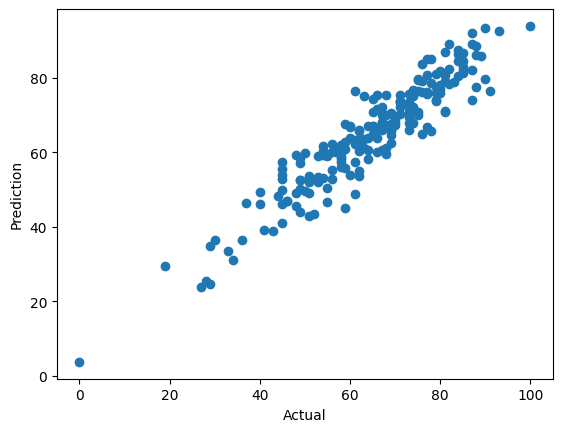

In [54]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Prediction')

<Axes: xlabel='math score'>

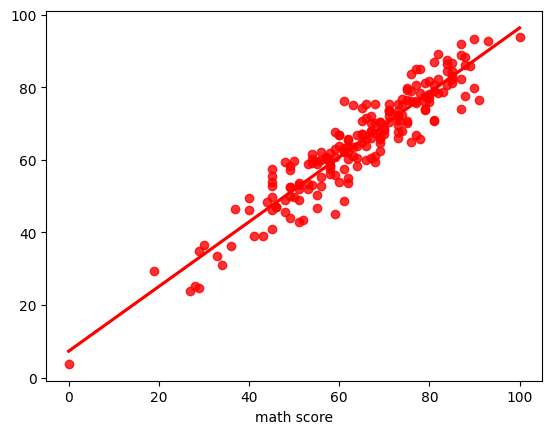

In [55]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

In [57]:
## Difference between Acutual And Predicted
pred_df = pd.DataFrame({'Actual Value':y_test,'Predicted_values':y_pred,'Difference':y_test-y_pred})
pred_df.head()

,Actual Value,Predicted_values,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
